In [1]:
from opensoundscape import Audio, Spectrogram, CNN, BoxedAnnotations

import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path
import matplotlib
from matplotlib import pyplot as plt
def figsize(w,h):
    plt.rcParams['figure.figsize']=[w,h]
figsize(15,5) #for big visuals
%config InlineBackend.figure_format = 'retina'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
from ast import literal_eval

In [4]:
root = Path("../../../localization_dataset_labeled_clips/")
songs = pd.read_csv(root / "localized_events.csv")
songs["file_ids"] = songs["file_ids"].apply(literal_eval)

audio_file_table = pd.read_csv(
    root / "localization_metadata/audio_file_table.csv", index_col=0
)

In [ ]:
def plot_spec_on_ax(
    self,
    ax,
    inline=False,
    fname=None,
    show_colorbar=False,
    range=(-100, -20),
    kHz=True,
):
    """Plot the spectrogram with matplotlib.pyplot

    Args:
        inline=True:
        fname=None: specify a string path to save the plot to (ending in .png/.pdf)
        show_colorbar: include image legend colorbar from pyplot
        range: tuple of (min,max) values of .spectrogram to map to the lowest/highest
            pixel values. Values outside this range will be clipped to the min/max values
        kHz: bool [default:False] if True, y axis is plotted in units of kHz rather than Hz
    """
    norm = matplotlib.colors.Normalize(vmin=range[0], vmax=range[1])

    # if user specifies kHz=True, use kHz units rather than Hz on y axis
    y = self.frequencies / 1000 if kHz else self.frequencies
    ax.pcolormesh(
        self.times,
        y,
        self.spectrogram,
        shading="auto",
        cmap="Greys",
        norm=norm,
    )

    ax.set_xlabel("Time (sec)")
    ax.set_ylabel(f"Frequency ({'kHz' if kHz else 'Hz'})")
    if show_colorbar:
        plt.colorbar()

    # if fname is not None, save to file path fname
    if fname:
        plt.savefig(fname)

    # if not saving to file, check if a matplotlib backend is available
    if inline:
        plt.show()

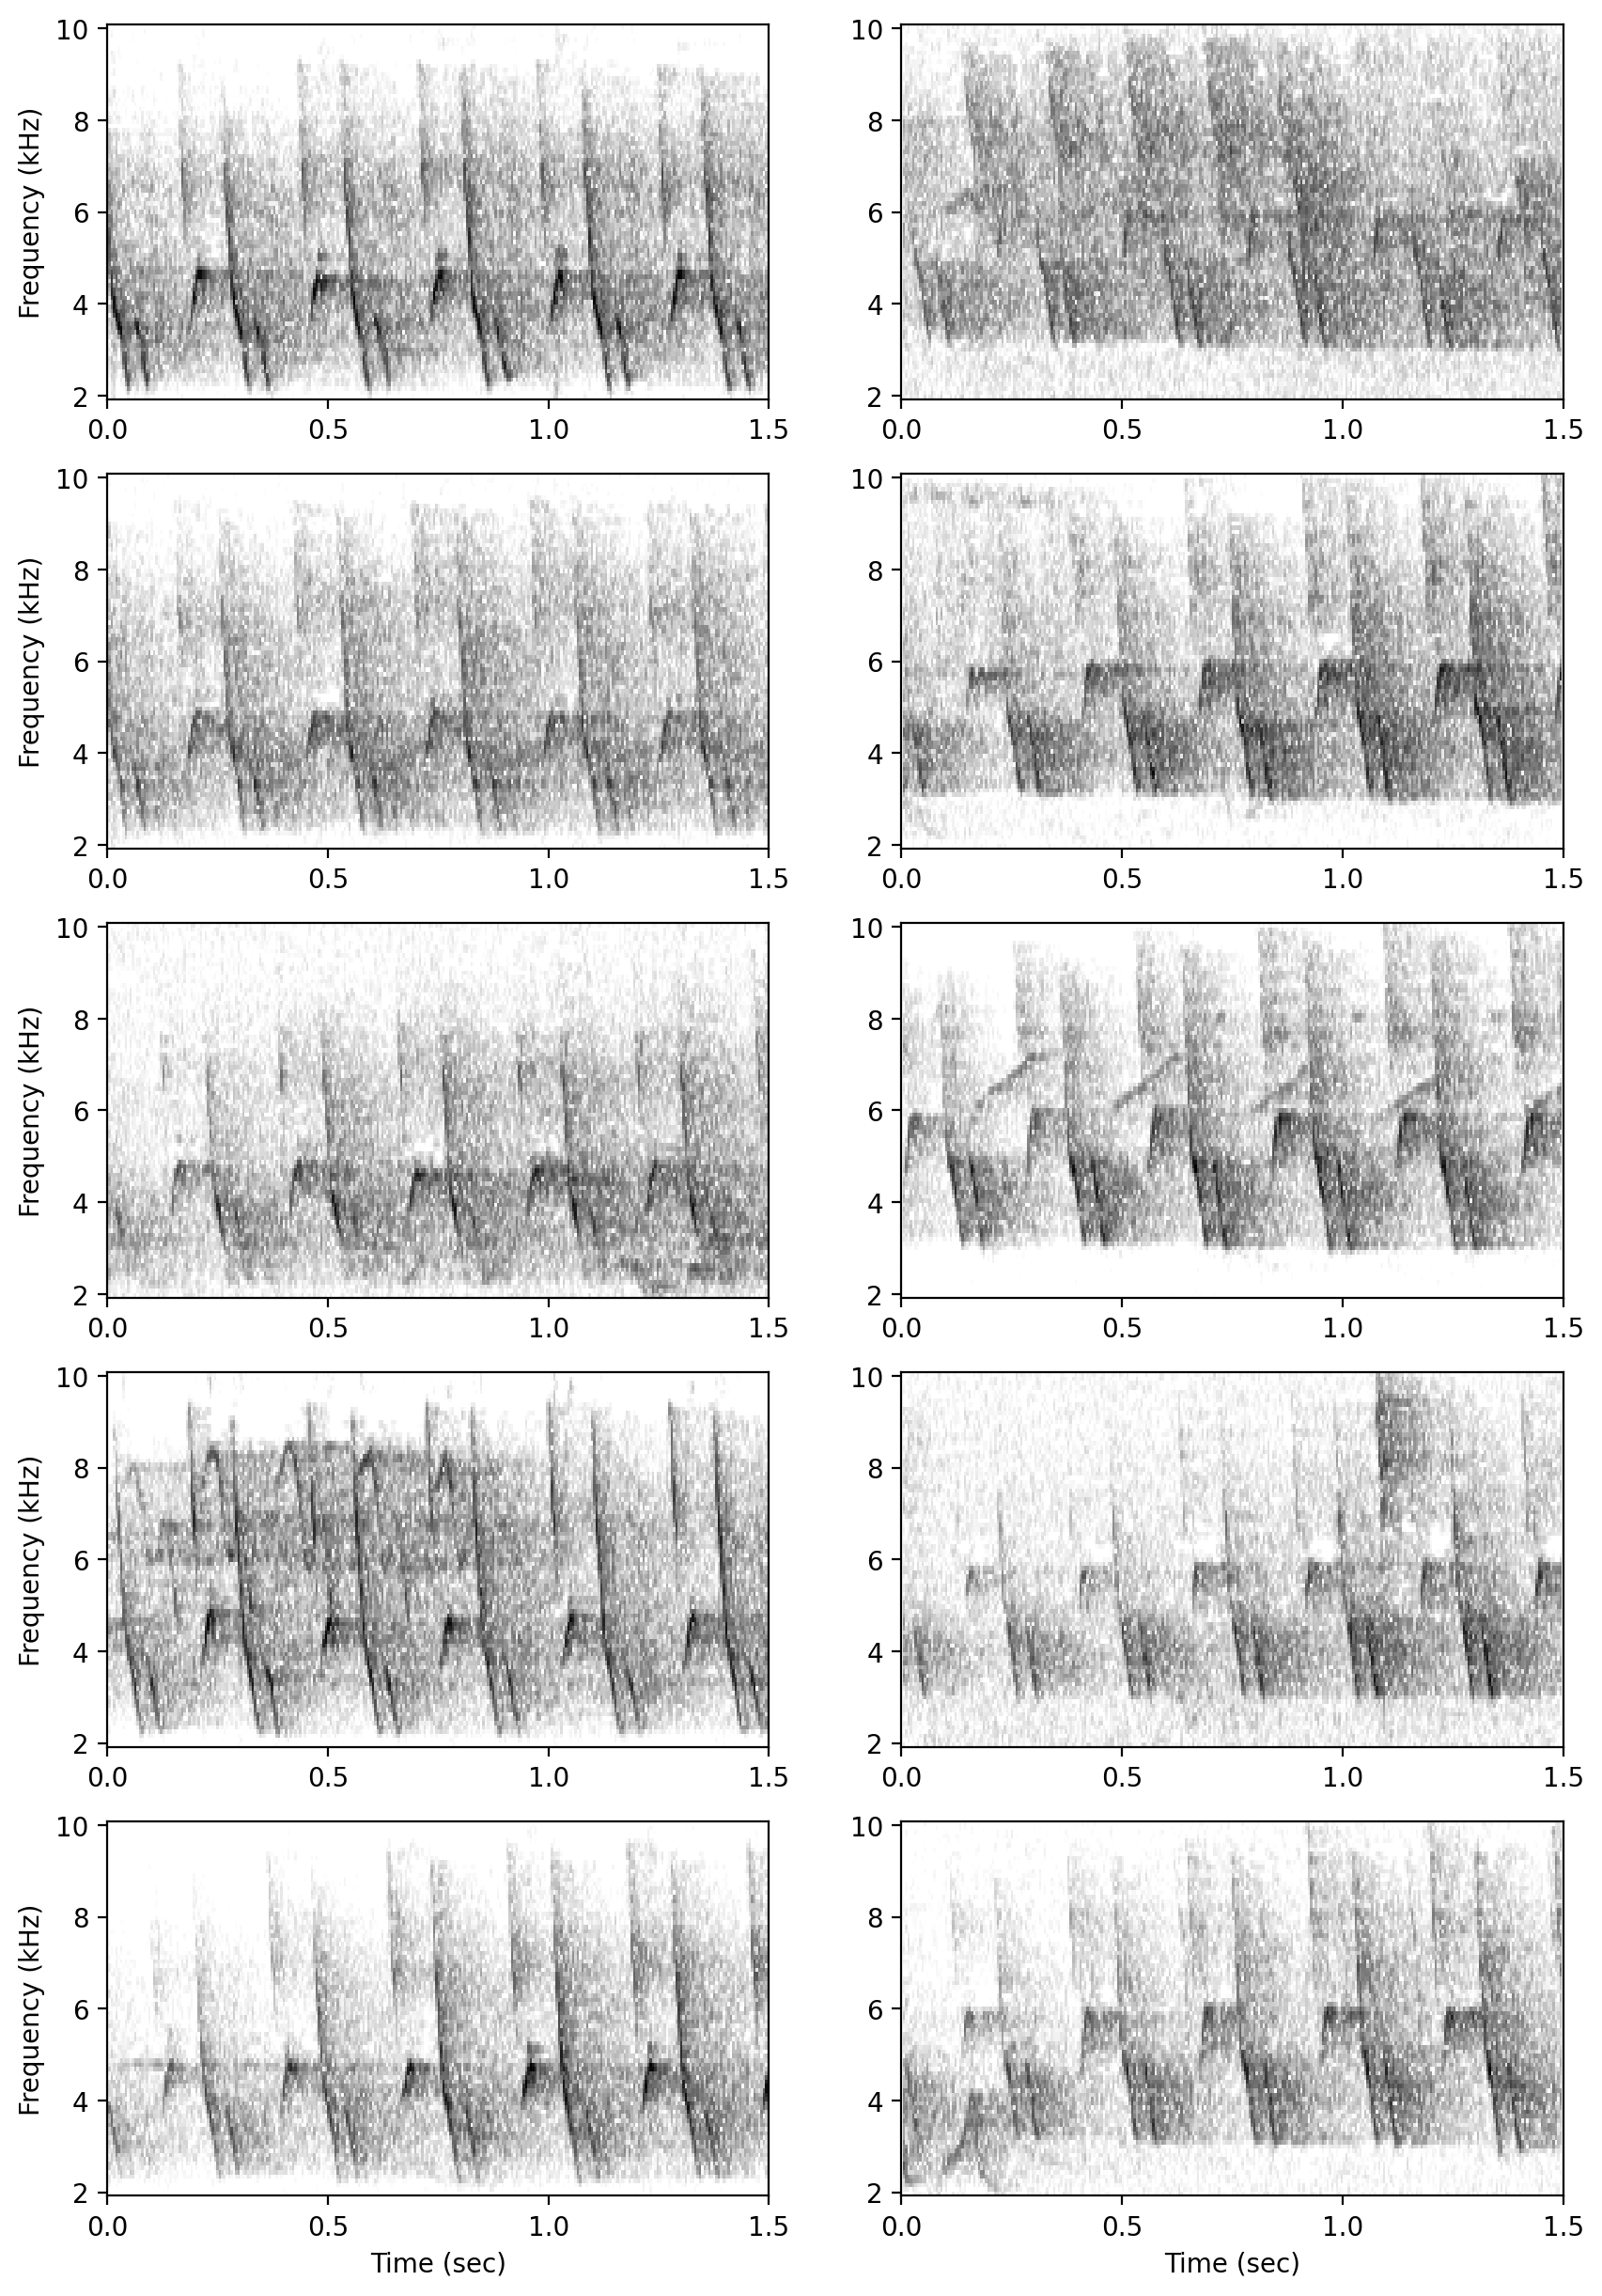

In [ ]:
figsize(10, 15)
fig, axs = plt.subplots(5, 2)
for col_idx, label in enumerate((23, 26)):

    for i, row in (
        songs[songs["aiid_label_cc"].isin((label,))].sample(5).reset_index().iterrows()
    ):
        ax = axs[i, col_idx]

        # select the file of the recorder nearest to the event
        clip_name = row.file_ids[np.argmin(row.mic_distances_m)]
        clip_path = root / audio_file_table.at[clip_name, "rel_path"]
        # since file is 10s and we want central 1.5s, load starting at 4 seconds
        a = Audio.from_file(clip_path, offset=4, duration=1.5).normalize()
        s = Spectrogram.from_audio(a).bandpass(2000, 10000)
        # print((row['aiid_label'],row['aiid_label_cc'], row['event_timestamp']))
        plot_spec_on_ax(s, ax=ax, kHz=True, range=[-60, -10])
        ax.set_yticks([2, 4, 6, 8, 10])
        ax.set_xticks([0, 0.5, 1, 1.5])
        # a.show_widget()

        if i != 4:
            ax.set_xlabel(None)
        if col_idx != 0:
            ax.set_ylabel(None)


plt.savefig("../../figures/FigureS2_annotator_conflict_1.pdf")

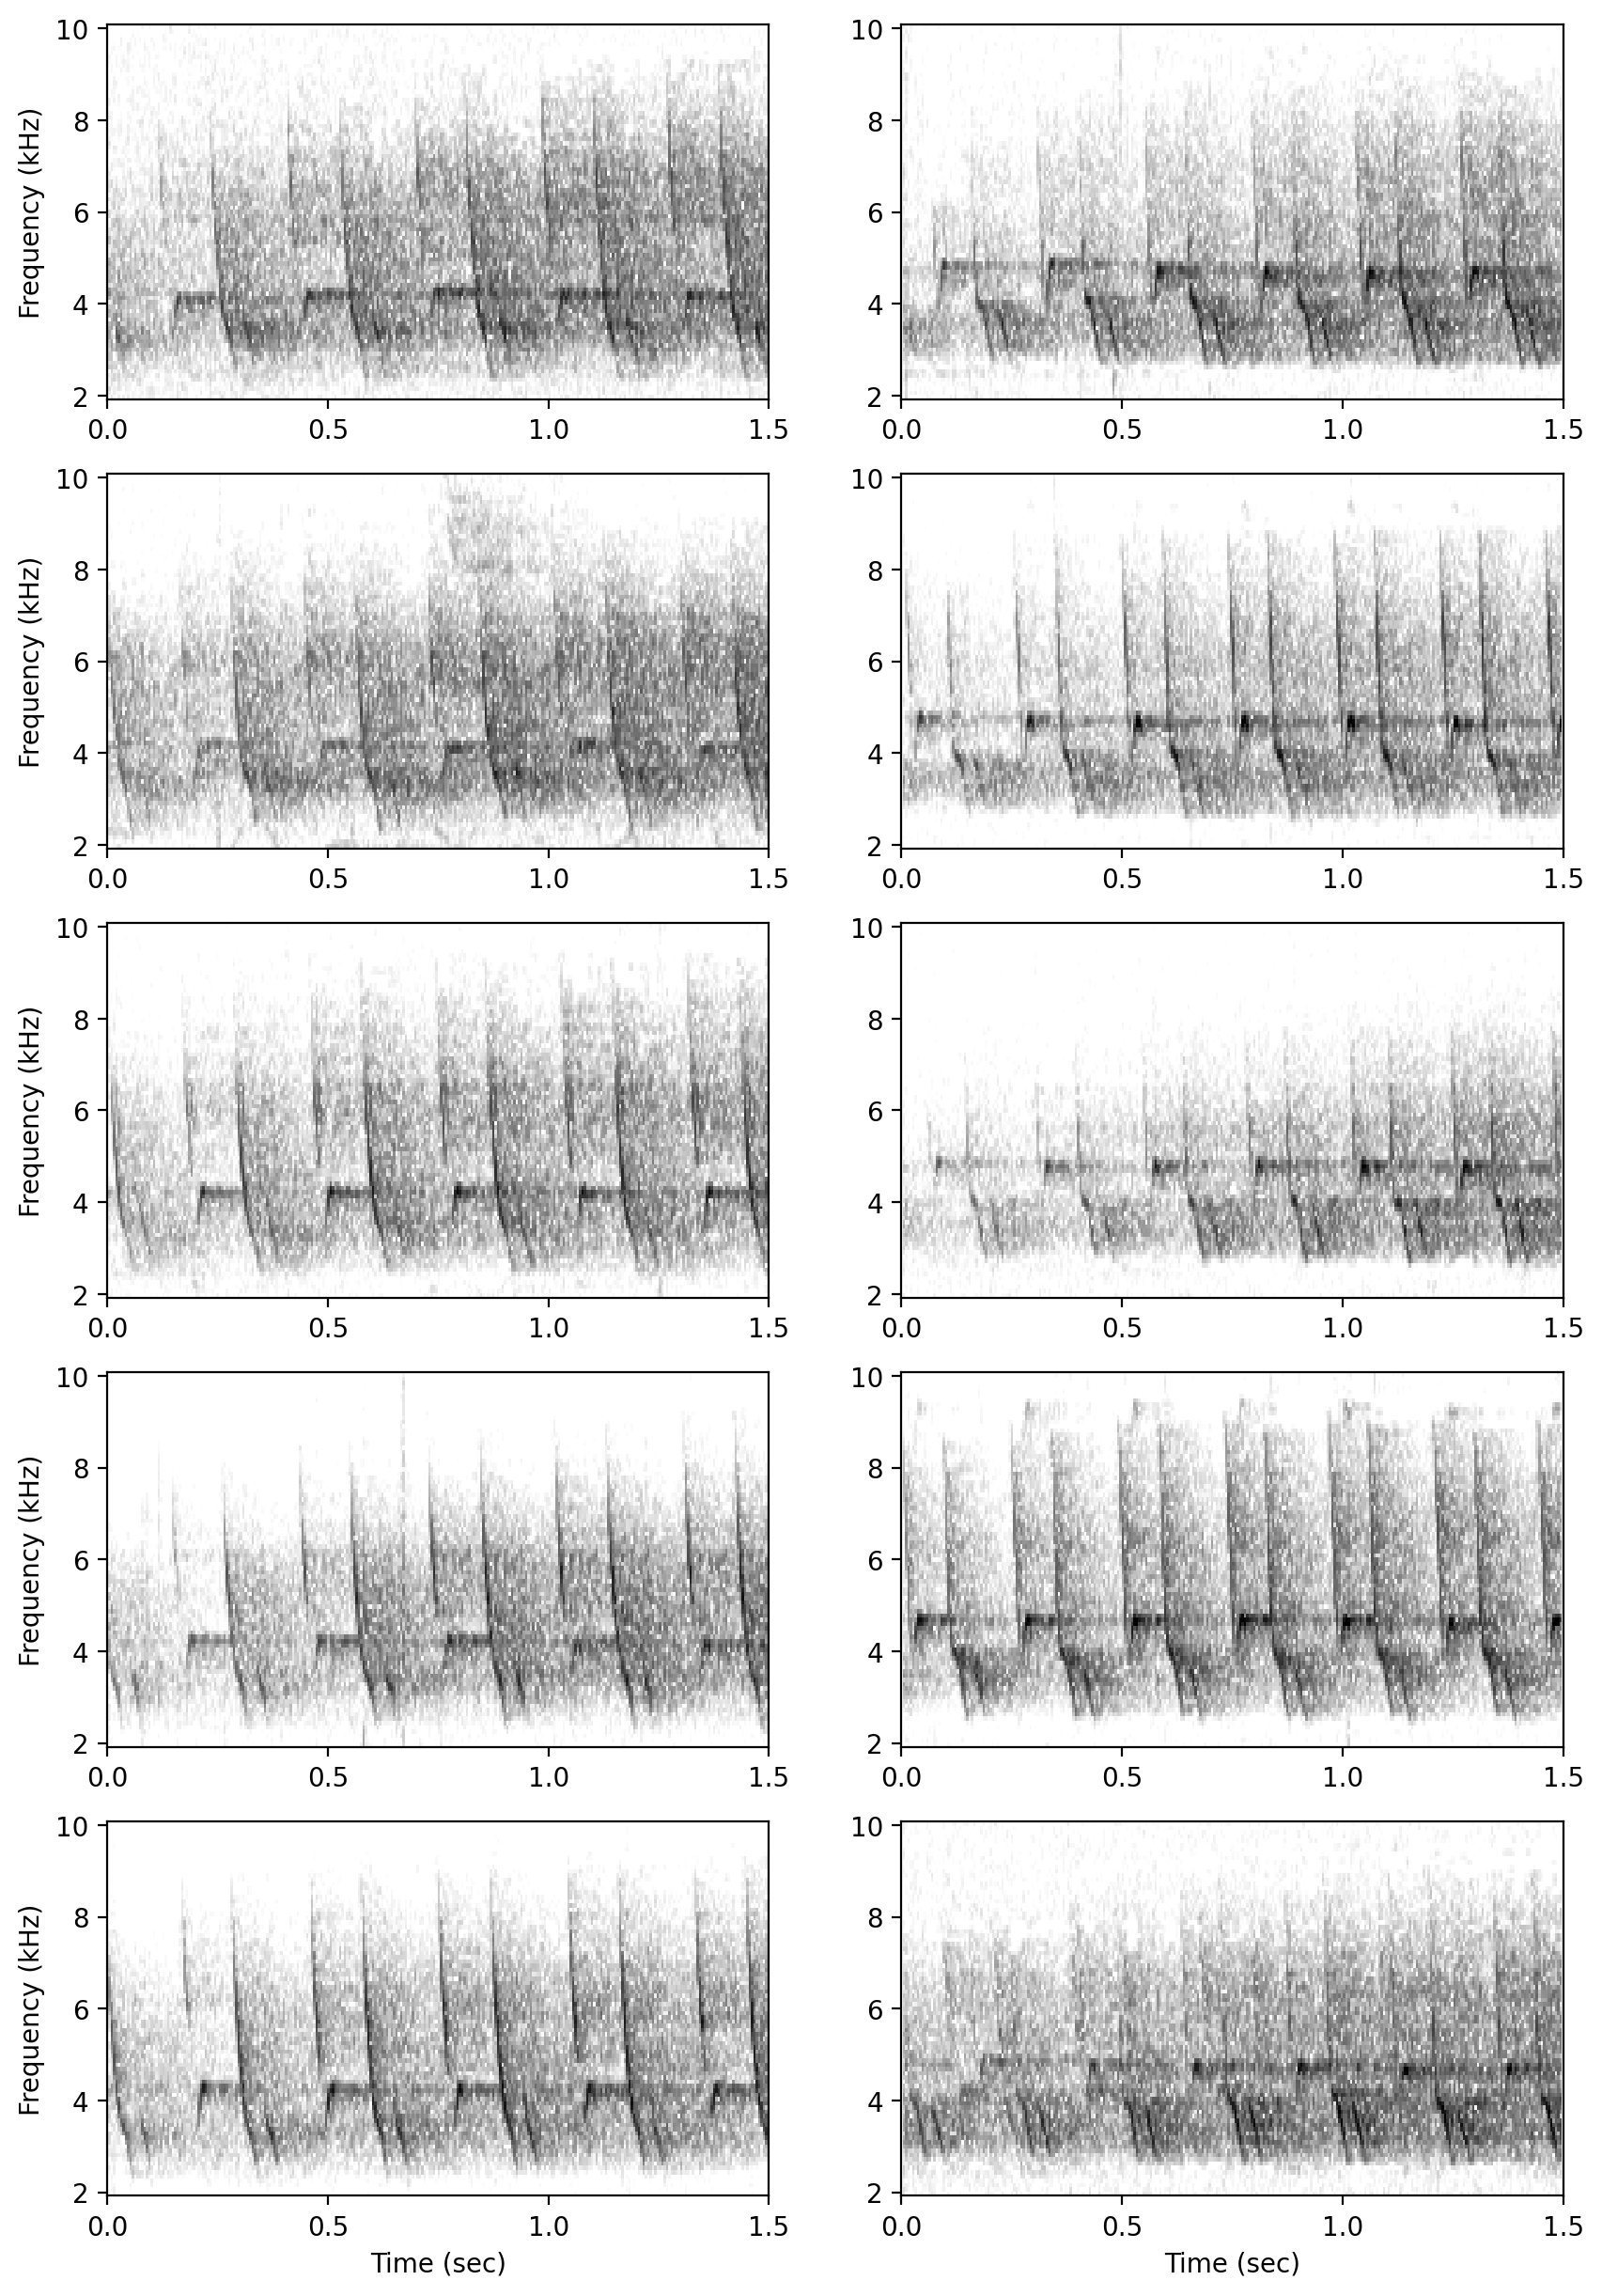

In [ ]:
figsize(10, 15)
fig, axs = plt.subplots(5, 2)
for col_idx, label in enumerate((14, 15)):

    for i, row in (
        songs[songs["aiid_label_cc"].isin((label,))].sample(5).reset_index().iterrows()
    ):
        ax = axs[i, col_idx]

        # select the file of the recorder nearest to the event
        clip_name = row.file_ids[np.argmin(row.mic_distances_m)]
        clip_path = root / audio_file_table.at[clip_name, "rel_path"]
        # since file is 10s and we want central 1.5s, load starting at 4 seconds
        a = Audio.from_file(clip_path, offset=4, duration=1.5).normalize()
        s = Spectrogram.from_audio(a).bandpass(2000, 10000)
        # print((row['aiid_label'],row['aiid_label_cc'], row['event_timestamp']))
        plot_spec_on_ax(s, ax=ax, kHz=True, range=[-60, -10])
        ax.set_yticks([2, 4, 6, 8, 10])
        ax.set_xticks([0, 0.5, 1, 1.5])
        # a.show_widget()

        if i != 4:
            ax.set_xlabel(None)
        if col_idx != 0:
            ax.set_ylabel(None)


plt.savefig("../../figures/FigureS3_annotator_conflict_2.pdf")